# Overview

Articles:
* https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py
* A Priori: https://www.section.io/engineering-education/apriori-algorithm-in-python/
* k-Means: https://becominghuman.ai/clustering-real-estate-data-594894e24484
* DBScan: https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

<b> Keywords:</b> Principal Component Analysis, etc...

# Notebook Set-Up

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)           # prevents scientific notation

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [17]:
pd.set_option('display.max_columns', None)

github = r'https://raw.githubusercontent.com/mattlibonati/Northwestern-MSDS-Capstone-2023/main/Data/transformed_datasets/'

# Census
census_ss     = pd.read_csv(github + 'census_standard_scaled.csv').fillna(0).drop(columns=['Unnamed: 0','GEOID'])
census_mm     = pd.read_csv(github + 'census_minmax_scaled.csv').fillna(0).drop(columns=['Unnamed: 0','GEOID'])
census_log    = pd.read_csv(github + 'census_log_transformed.csv').fillna(0).drop(columns=['Unnamed: 0','GEOID'])
census_log_ss = pd.read_csv(github + 'census_log_ss.csv').fillna(0).drop(columns=['Unnamed: 0','GEOID'])
census_log_mm = pd.read_csv(github + 'census_log_mm.csv').fillna(0).drop(columns=['Unnamed: 0','GEOID'])

# Redfin
redfin_ss     = pd.read_csv(github + 'redfin_standard_scaled.csv').fillna(0).drop(columns=['Unnamed: 0'])
redfin_mm     = pd.read_csv(github + 'redfin_minmax_scaled.csv').fillna(0).drop(columns=['Unnamed: 0'])
redfin_log    = pd.read_csv(github + 'redfin_log_transformed.csv').fillna(0).drop(columns=['Unnamed: 0'])
redfin_log_ss = pd.read_csv(github + 'redfin_log_ss.csv').fillna(0).drop(columns=['Unnamed: 0'])
redfin_log_mm = pd.read_csv(github + 'redfin_log_mm.csv').fillna(0).drop(columns=['Unnamed: 0'])

# Final
final_ss     = pd.read_csv(github + 'final_standard_scaled.csv').fillna(0).drop(columns=['Unnamed: 0'])
final_mm     = pd.read_csv(github + 'final_minmax_scaled.csv').fillna(0).drop(columns=['Unnamed: 0'])
final_log    = pd.read_csv(github + 'final_log_transformed.csv').fillna(0).drop(columns=['Unnamed: 0'])
final_log_ss = pd.read_csv(github + 'final_log_ss.csv').fillna(0).drop(columns=['Unnamed: 0'])
final_log_mm = pd.read_csv(github + 'final_log_mm.csv').fillna(0).drop(columns=['Unnamed: 0'])

pd.set_option('display.max_columns', None)

##### PCA

In [3]:
# function to plot pca componments into clusers by party labels
def pca_plot(df):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    ax.scatter(df['PC1'], df['PC2'], df['PC3'], c='red',  s=30, label = 'Pts')
    #ax.scatter(df[df['class'] == 0]['PC1'], df[df['class'] == 0]['PC2'], df[df['class'] == 0]['PC3'], c='blue', s=30, label = 'Good')
    
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    _ = plt.title("3D Scatter Plot Example")
    _ = plt.legend()
    _ = plt.tight_layout()
    _ = plt.show()
    return _

#### PCA Function

from sklearn.decomposition import PCA
import numpy as np

def perform_pca(df_set, pca_param):

    pca_input = df_set.copy()

    pca = PCA(pca_param) # alternative PCA method which chooses least components for specified variance 
    x = pca_input.iloc[:, :-1] # set x to explanatory variables
    principalComponents = pca.fit_transform(x)
    
    pca_cols = []
    for i in range(0,pca.n_components_):
        pca_cols.append('PC'+str(i+1))
    
    principalDf = pd.DataFrame(data=principalComponents, columns=pca_cols)
    
    print(pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))
    
    # PCA Loadings
    loadings = pd.DataFrame(pca.components_.T, columns=pca_cols, index=pca_input.columns[0:-1]).sort_values(by=pca_cols, ascending = False)

    # most important factors    
    features = pca_input.columns 
    most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
    most_important_names = [features[most_important[i]] for i in range(pca.n_components_)]       # get the names
    dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(pca.n_components_)}        # create reference dict    
    pca_3_df = pd.DataFrame(sorted(dic.items()),columns = ['Component','Field']) # build the dataframe
    
    return loadings, pca_3_df, principalDf 

# Final Dataset

Final - Standard Scaled

[0.33991671 0.09272488 0.05187202] 0.48451360533425225


,PC1,PC2,PC3
house_price_feb_2022,0.177,0.024,0.077
median_home_value,0.177,0.013,0.012
house_price_mar_2022,0.177,0.024,0.078
house_price_apr_2022,0.177,0.023,0.080
house_price_avg_q2_2022,0.177,0.024,0.081
...,...,...,...
unemployed_rate_q3_22,-0.044,0.236,-0.025
one_person_household,-0.048,0.072,-0.159
six_rooms,-0.067,-0.031,0.103
five_rooms,-0.077,0.143,0.119


[0.33991671 0.09272488 0.05187202] 0.4845136061375087


,Component,Field
0,PC1,house_price_feb_2022
1,PC2,median_number_rooms
2,PC3,renter_occupied


[0.33991671 0.09272488 0.05187202] 0.48451360451514647


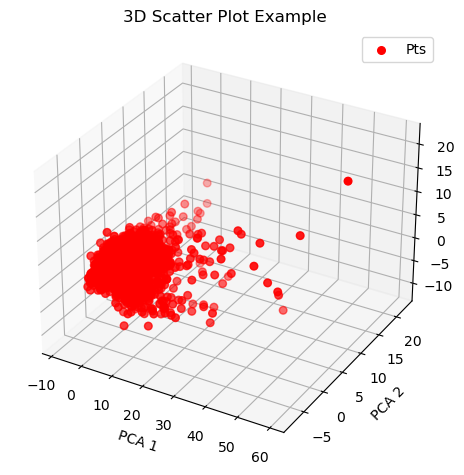

[0.33991671 0.09272488 0.05187202 0.04419194 0.03993876 0.03077656
 0.02865856 0.02584976 0.0223982  0.02115225 0.0190815  0.01816393
 0.01767714 0.01652529 0.01539139 0.01487465 0.01292644] 0.8121199668749374
[0.33991671 0.09272487 0.05187201 0.04419177 0.0399387  0.03077608
 0.02865537 0.02584891 0.02239155 0.0210823 ] 0.6973982795336745


In [20]:
###################
#%pylab
#%matplotlib inline  
display(perform_pca(final_ss, 3)[0])

display(perform_pca(final_ss, 3)[1])

pca_plot(perform_pca(final_ss, 3)[2])

# Excel Output
perform_pca(final_ss, .80)[0].to_csv(r'C:\Users\Mattl\Desktop\Data\final_ss_pca_loadings.csv')
perform_pca(final_ss, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\final_ss_pca_components.csv')

Final - Min-Max Scaled 

[0.18891307 0.16159238 0.10324084] 0.45374629009590195


,PC1,PC2,PC3
attained_bachelors,0.251,-0.015,0.039
more_than_200k,0.222,0.001,-0.038
median_gross_rent,0.216,0.016,-0.063
mhhi,0.214,-0.016,-0.016
mhhi_family,0.214,-0.016,-0.001
...,...,...,...
black,-0.073,0.079,-0.215
vacant_units,-0.081,-0.002,0.068
transportation_drive_alone,-0.083,-0.010,-0.063
six_rooms,-0.088,0.003,-0.076


[0.18891307 0.16159238 0.10324084] 0.4537462900959039


,Component,Field
0,PC1,attained_bachelors
1,PC2,state
2,PC3,black_homeowners


[0.18891307 0.16159238 0.10324084] 0.45374629009590406


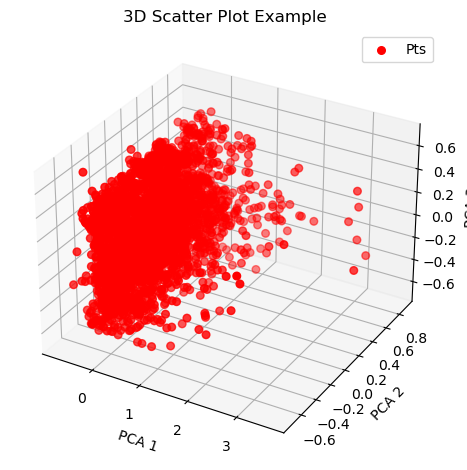

[0.18891307 0.16159238 0.10324084 0.08454331 0.07963965 0.04788249
 0.04419494 0.03734472 0.02502871 0.0239823  0.01973736] 0.8160997816714395
[0.18891307 0.16159238 0.10324084 0.08454331 0.07963965 0.04788249
 0.04419494 0.03734471 0.02502863 0.02398198] 0.7963619940547226


In [21]:
###################
#%pylab
#%matplotlib inline  
display(perform_pca(final_mm, 3)[0])

display(perform_pca(final_mm, 3)[1])

pca_plot(perform_pca(final_mm, 3)[2])

# Excel Output
perform_pca(final_mm, .80)[0].to_csv(r'C:\Users\Mattl\Desktop\Data\final_mm_pca_loadings.csv')
perform_pca(final_mm, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\final_mm_pca_components.csv')

Final - Log Standard Scaled

[0.32701185 0.08593043 0.05220333] 0.4651456057909584


,PC1,PC2,PC3
house_price_mar_2022,0.181,0.032,0.015
house_price_feb_2022,0.181,0.032,0.015
house_price_apr_2022,0.181,0.031,0.015
house_price_may_2022,0.181,0.030,0.015
house_price_avg_q2_2022,0.181,0.031,0.015
...,...,...,...
six_rooms,-0.065,-0.053,-0.180
emp_location_quotient_natural_resources_and_mining,-0.073,-0.028,0.210
wage_location_quotient_natural_resources_and_mining,-0.075,-0.021,0.205
vacant_units,-0.080,0.123,0.218


[0.32701185 0.08593043 0.05220333] 0.46514560633746127


,Component,Field
0,PC1,house_price_mar_2022
1,PC2,median_number_rooms
2,PC3,total_pop


[0.32701185 0.08593043 0.05220333] 0.46514560617257306


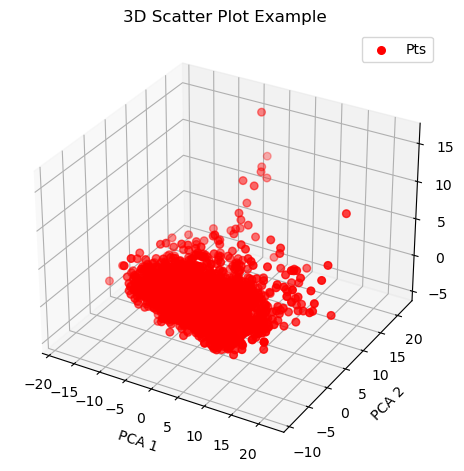

[0.32701185 0.08593043 0.05220333 0.04839148 0.03996992 0.03003762
 0.02770832 0.02632055 0.02386575 0.01901539 0.01854868 0.01691809
 0.01628172 0.01550119 0.01472184 0.01368978 0.01311326 0.01261438] 0.8018436043365067
[0.32701185 0.08593043 0.05220327 0.04839137 0.03996983 0.03003543
 0.02770146 0.02631051 0.02386437 0.01899229] 0.6804107999270438


In [22]:
###################
#%pylab
#%matplotlib inline  
display(perform_pca(final_log_ss, 3)[0])

display(perform_pca(final_log_ss, 3)[1])

pca_plot(perform_pca(final_log_ss, 3)[2])

# Excel Output
perform_pca(final_log_ss, .80)[0].to_csv(r'C:\Users\Mattl\Desktop\Data\final_log_ss_pca_loadings.csv')
perform_pca(final_log_ss, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\final_log_ss_pca_components.csv')

Final - Log Min-Max Scaled

[0.32493238 0.10372666 0.07710162] 0.5057606646097748


,PC1,PC2,PC3
house_price_avg_q1_2022,0.196,-0.036,-0.010
house_price_jan_2022,0.195,-0.036,-0.011
house_price_may_2022,0.194,-0.036,0.007
house_price_jun_2022,0.194,-0.036,0.007
house_price_avg_q2_2022,0.194,-0.036,0.006
...,...,...,...
transportation_public,-0.057,-0.028,0.275
five_rooms,-0.060,0.062,-0.026
emp_location_quotient_natural_resources_and_mining,-0.087,-0.038,0.086
wage_location_quotient_natural_resources_and_mining,-0.092,-0.034,0.085


[0.32493238 0.10372666 0.07710162] 0.5057606646102166


,Component,Field
0,PC1,house_price_avg_q1_2022
1,PC2,emp_location_quotient_unclassified
2,PC3,black_homeowners


[0.32493238 0.10372666 0.07710162] 0.5057606646102621


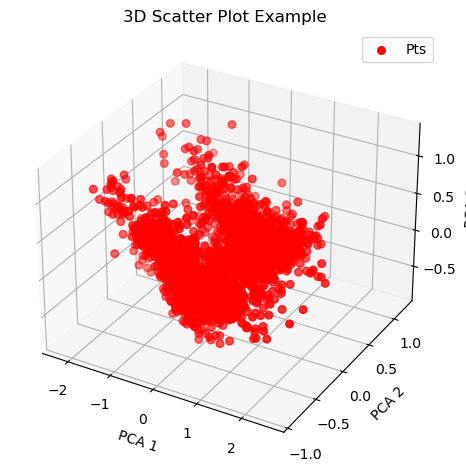

[0.32701185 0.08593043 0.05220333 0.04839148 0.03996992 0.03003762
 0.02770832 0.02632055 0.02386575 0.01901539 0.01854868 0.01691809
 0.01628172 0.01550119 0.01472184 0.01368978 0.01311326 0.01261438] 0.8018436043365067
[0.32701185 0.08593043 0.05220331 0.04839144 0.03996982 0.03003584
 0.02770585 0.02631563 0.02384917 0.01897274] 0.6803860763505957


In [23]:
###################
#%pylab
#%matplotlib inline  
display(perform_pca(final_log_mm, 3)[0])

display(perform_pca(final_log_mm, 3)[1])

pca_plot(perform_pca(final_log_mm, 3)[2])

# Excel Output
perform_pca(final_log_ss, .80)[0].to_csv(r'C:\Users\Mattl\Desktop\Data\final_log_ss_pca_loadings.csv')
perform_pca(final_log_ss, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\final_log_ss_pca_components.csv')

# Census

Census Standard Scaled

[0.46286669 0.19112109 0.0790345  0.05963439 0.04576624] 0.8384229140342181


,PC1,PC2,PC3,PC4,PC5
kitchen_complete,0.289,0.175,0.053,-0.041,-0.032
plumbing_complete,0.289,0.175,0.053,-0.040,-0.032
one_person_household,0.285,0.188,0.069,-0.004,-0.000
more_than_200k,0.283,0.091,0.009,-0.022,0.049
renter_occuppied,0.278,0.194,0.034,-0.007,0.050
transportation_drive_alone,0.278,0.165,0.066,-0.091,-0.114
owners_25_34,0.274,0.148,0.091,-0.095,-0.125
vacant_units,0.258,0.189,0.012,0.063,-0.020
median_gross_rent,0.228,-0.261,-0.158,0.041,-0.054
black_homeowners,0.218,0.193,0.072,-0.047,-0.030


[0.46286669 0.19112109 0.0790345  0.05963439 0.04576624] 0.8384229140342181


,Component,Field
0,PC1,kitchen_complete
1,PC2,mhhi
2,PC3,mean_household_size_renter
3,PC4,mean_household_size_owner
4,PC5,median_year_built


[0.46286669 0.19112109 0.0790345  0.05963439 0.04576624] 0.8384229140342181


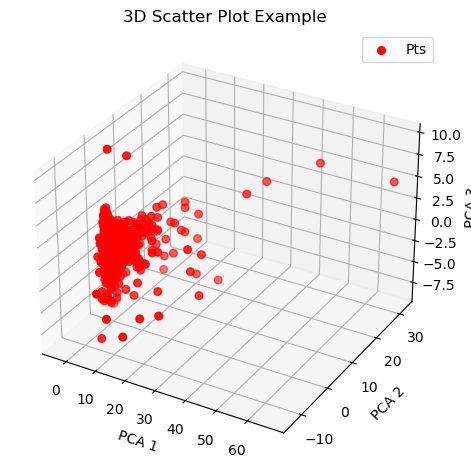

[0.46286669 0.19112109 0.0790345  0.05963439 0.04576624] 0.8384229140342181
[0.46286669 0.19112109 0.0790345  0.05963439 0.04576624 0.04040843
 0.02967047 0.02294509 0.02087247 0.01387246] 0.9661918304018069


In [9]:
###################
#%pylab
#%matplotlib inline  
display(perform_pca(census_ss, .80)[0])

display(perform_pca(census_ss, .80)[1])

pca_plot(perform_pca(census_ss, .80)[2])

# Excel Output
perform_pca(census_ss, .80)[0].to_csv(r'C:\Users\Mattl\Desktop\Data\census_ss_pca_loadings.csv')
perform_pca(census_ss, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\census_ss_pca_components.csv')

Census - Min-Max Scaled

[0.528187   0.14502826 0.08578191] 0.7589971646697431


,PC1,PC2,PC3
mhhi,0.424,-0.258,0.024
mhhi_nonfamily,0.410,-0.196,0.035
median_gross_rent,0.400,0.198,0.046
mhhi_family,0.400,-0.258,-0.108
median_home_value,0.318,0.140,0.037
lower_quartile_home_value,0.316,0.138,0.027
upper_quartile_home_value,0.270,0.119,0.036
owners_25_34,0.106,0.191,0.014
more_than_200k,0.085,0.128,0.029
vacant_units,0.078,0.218,0.001


[0.528187   0.14502826 0.08578191] 0.7589971646697875


,Component,Field
0,PC1,mhhi
1,PC2,median_gross_rent_frac_income
2,PC3,mean_household_size_renter


[0.528187   0.14502826 0.08578191] 0.7589971646697885


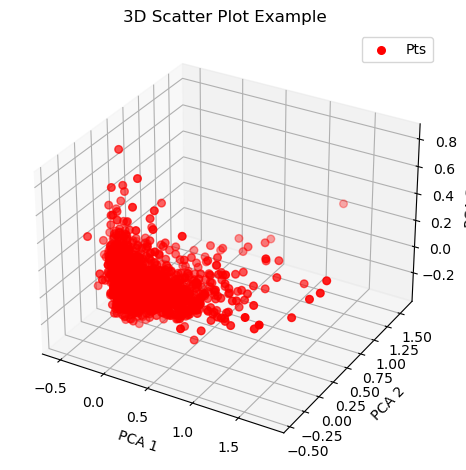

[0.528187   0.14502826 0.08578191 0.08054236 0.05096117 0.02673931
 0.02409052 0.01436172 0.01168005 0.00755783] 0.9749301206134239


In [6]:
###################
#%pylab
%matplotlib inline  
display(perform_pca(census_mm, 3)[0])

display(perform_pca(census_mm, 3)[1])

pca_plot(perform_pca(census_mm, 3)[2])

perform_pca(census_mm, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\census_mm_pca_components.csv')

Census - Log Standard Scaled

[0.51970288 0.17020262 0.07199405] 0.7618995543437346


,PC1,PC2,PC3
more_than_200k,0.285,-0.006,-0.065
transportation_drive_alone,0.278,-0.143,-0.075
plumbing_complete,0.277,-0.162,-0.076
kitchen_complete,0.277,-0.163,-0.075
one_person_household,0.272,-0.176,-0.117
renter_occuppied,0.271,-0.182,-0.052
owners_25_34,0.269,-0.116,-0.134
transportation_public,0.250,-0.069,0.017
median_gross_rent,0.240,0.174,0.197
vacant_units,0.236,-0.225,0.009


[0.51970288 0.17020262 0.07199405] 0.7618995543442297


,Component,Field
0,PC1,more_than_200k
1,PC2,mhhi
2,PC3,mean_household_size_renter


[0.51970288 0.17020262 0.07199405] 0.7618995543409915


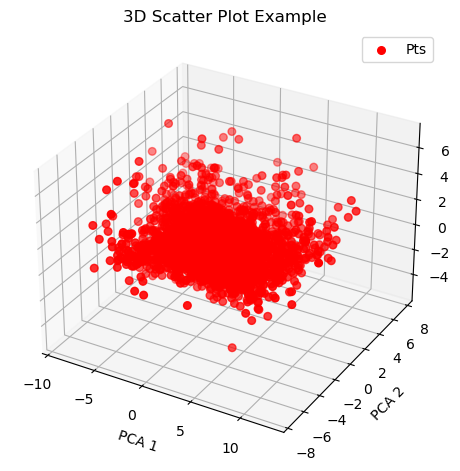

[0.51970288 0.17020262 0.07199405 0.05579903 0.04542063 0.03314947
 0.02587131 0.02013824 0.01567693 0.01267555] 0.9706307279713381


In [11]:
###################
#%pylab
%matplotlib inline  
display(perform_pca(census_log_ss, 3)[0])

display(perform_pca(census_log_ss, 3)[1])

pca_plot(perform_pca(census_log_ss, 3)[2])

perform_pca(census_log_ss, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\census_log_ss_pca_components.csv')

Census - Log Min Max Scaled

[0.60741205 0.17147895 0.05527967] 0.8341706727858589


,PC1,PC2,PC3
black_homeowners,0.397,-0.539,0.694
transportation_public,0.355,0.032,-0.298
more_than_200k,0.309,0.087,-0.061
renter_occuppied,0.275,-0.094,-0.177
owners_25_34,0.270,-0.032,-0.183
kitchen_complete,0.258,-0.068,-0.163
plumbing_complete,0.258,-0.067,-0.163
transportation_drive_alone,0.256,-0.053,-0.138
vacant_units,0.220,-0.117,-0.214
one_person_household,0.212,-0.067,-0.156


[0.60741205 0.17147895 0.05527967] 0.8341706727857844


,Component,Field
0,PC1,black_homeowners
1,PC2,black_homeowners
2,PC3,black_homeowners


[0.60741205 0.17147895 0.05527967] 0.8341706727822709


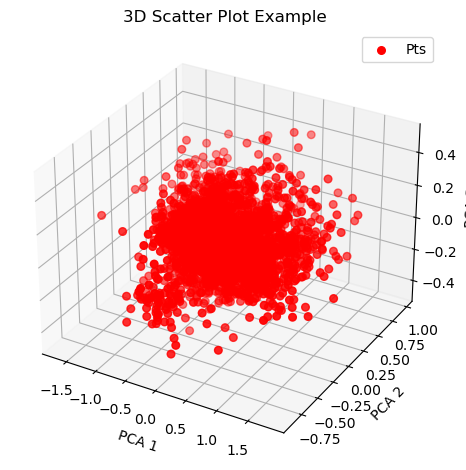

[0.60741205 0.17147895 0.05527967 0.04186075 0.02923847 0.02568006
 0.01638628 0.01330886 0.00892964 0.00763721] 0.977211947204421


In [12]:
###################
#%pylab
%matplotlib inline  
display(perform_pca(census_log_mm, 3)[0])

display(perform_pca(census_log_mm, 3)[1])

pca_plot(perform_pca(census_log_mm, 3)[2])

perform_pca(census_log_mm, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\census_log_mm_pca_components.csv')

# Redfin

Redfin - Standard Scaled

1. How active is the market?
2. Geo-Location
3. Price Vs Market - how are these houses priced compared to market?

[0.0852839  0.07123891 0.05890672] 0.2154295343361521


,PC1,PC2,PC3
homes_sold,0.472,0.143,-0.142
new_listings,0.441,0.124,-0.150
pending_sales,0.431,0.127,-0.133
inventory,0.426,0.117,-0.171
median_list_price,0.141,0.017,0.182
median_list_ppsf,0.135,0.015,0.164
avg_sale_to_list,0.117,0.147,0.390
median_sale_price,0.114,0.028,0.161
sold_above_list,0.110,0.170,0.401
off_market_in_two_weeks,0.061,0.037,0.094


[0.0852839  0.07123894 0.05890668] 0.2154295246517724


,Component,Field
0,PC1,homes_sold
1,PC2,state
2,PC3,sold_above_list


[0.0852839  0.07123894 0.05890665] 0.21542949530946426


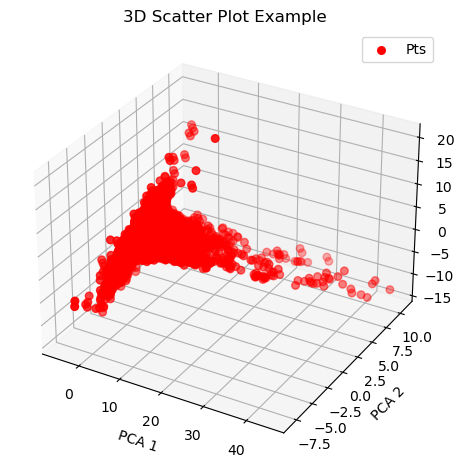

[0.08528387 0.0712384  0.05890585 0.05063294 0.04858105 0.04324796
 0.0419886  0.04035749 0.03935813 0.03690098] 0.5164952788108307
[0.08528386 0.07123892 0.05890602 0.05062619 0.04858143 0.0432502
 0.04199872 0.04042513 0.03934709 0.03694096] 0.5165985439006362


In [16]:
###################
# Plot Options
# pylab for 3d plot
#%pylab
%matplotlib inline  
display(perform_pca(redfin_ss, 3)[0])

display(perform_pca(redfin_ss, 3)[1])

pca_plot(perform_pca(redfin_ss, 3)[2])

perform_pca(redfin_ss, 10)[0].to_csv(r'C:\Users\Mattl\Desktop\Data\redfin_ss_pca_loadings.csv')
perform_pca(redfin_ss, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\redfin_ss_pca_components.csv')

 Redfin - MinMax Scaled

[0.20776516 0.18877952 0.1562846 ] 0.5528292805418012


,PC1,PC2,PC3
property_type,0.143,0.105,0.752
property_type_id,0.130,0.092,0.611
median_dom,0.007,0.002,-0.002
months_of_supply,0.001,0.000,-0.001
region_type_id,-0.000,-0.000,0.000
median_ppsf_mom,-0.000,0.000,-0.000
median_sale_price_mom,-0.000,0.000,-0.000
median_ppsf,-0.000,-0.000,0.000
median_ppsf_yoy,-0.000,-0.000,0.000
homes_sold_yoy,-0.001,-0.001,-0.000


[0.20776516 0.18877952 0.1562846 ] 0.5528292805418009


,Component,Field
0,PC1,off_market_in_two_weeks_yoy
1,PC2,state
2,PC3,property_type


[0.20776516 0.18877952 0.1562846 ] 0.5528292805418012


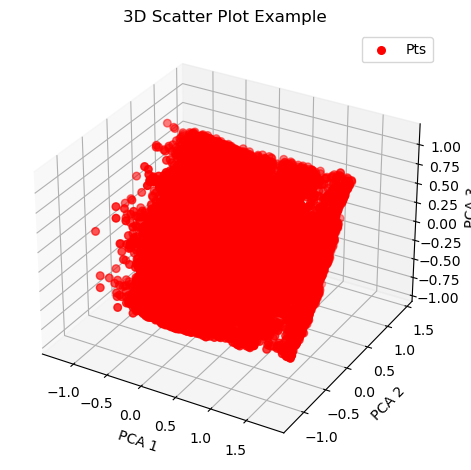

[0.20776516 0.18877952 0.1562846  0.08351258 0.06641653 0.05886831
 0.04615026 0.04029652 0.03902073 0.02995424] 0.9170484454016773


In [8]:
###################
# Plot Options
# pylab for 3d plot
#%pylab
%matplotlib inline  
display(perform_pca(redfin_mm, 3)[0])

display(perform_pca(redfin_mm, 3)[1])

pca_plot(perform_pca(redfin_mm, 3)[2])

perform_pca(redfin_mm, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\redfin_mm_pca_components.csv')

Redfin - Log Standard Scaled

[0.19886597 0.09502837 0.08978665] 0.3836809928870453


,PC1,PC2,PC3
sold_above_list,0.219,0.082,-0.182
off_market_in_two_weeks,0.213,0.084,-0.116
sold_above_list_yoy,0.160,0.063,-0.102
sold_above_list_mom,0.152,0.041,-0.072
off_market_in_two_weeks_yoy,0.141,0.047,-0.054
median_dom_mom,0.140,0.006,0.023
homes_sold_mom,0.138,0.037,-0.060
months_of_supply,0.127,-0.067,0.222
off_market_in_two_weeks_mom,0.127,0.035,-0.034
median_dom,0.124,-0.061,0.200


[0.19886597 0.09502837 0.08978665] 0.3836809928949011


,Component,Field
0,PC1,homes_sold
1,PC2,state
2,PC3,median_ppsf


[0.19886597 0.09502837 0.08978665] 0.383680992897366


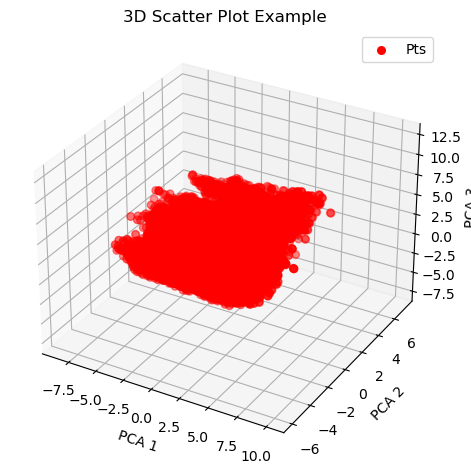

[0.19886597 0.09502837 0.08978665 0.04842665 0.04185893 0.03324061
 0.03130344 0.02856877 0.02653747 0.02569309] 0.6193099579719299


In [13]:
###################
#%pylab
%matplotlib inline  
display(perform_pca(redfin_log_ss, 3)[0])

display(perform_pca(redfin_log_ss, 3)[1])

pca_plot(perform_pca(redfin_log_ss, 3)[2])

perform_pca(redfin_log_ss, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\redfin_log_ss_pca_components.csv')

Redfin - Log Min-Max

[0.13582236 0.10576924 0.07160942] 0.3132010219859571


,PC1,PC2,PC3
sold_above_list,0.086,0.107,0.000
property_type,0.036,0.031,0.786
property_type_id,0.030,0.023,0.609
median_dom,0.018,0.035,-0.012
inventory_mom,0.017,0.118,0.003
table_id,0.003,-0.001,0.000
months_of_supply_mom,0.003,0.063,-0.007
state,0.003,-0.007,0.002
parent_metro_region,0.002,0.002,-0.002
state_code,0.002,-0.008,0.002


[0.13582236 0.10576924 0.07160944] 0.31320103802974053


,Component,Field
0,PC1,off_market_in_two_weeks_yoy
1,PC2,sold_above_list_mom
2,PC3,property_type


[0.13582236 0.10576924 0.07160943] 0.3132010356606536


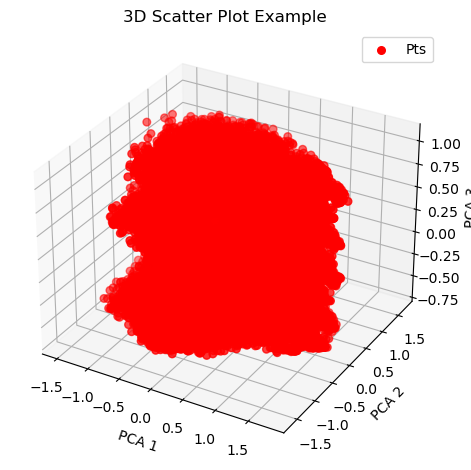

[0.13582236 0.10576924 0.07160943 0.06678384 0.05578441 0.04332642
 0.04066633 0.03492928 0.03476038 0.03240091] 0.6218525986038089


In [14]:
###################
#%pylab
%matplotlib inline  
display(perform_pca(redfin_log_mm, 3)[0])

display(perform_pca(redfin_log_mm, 3)[1])

pca_plot(perform_pca(redfin_log_mm, 3)[2])

perform_pca(redfin_log_mm, 10)[2].to_csv(r'C:\Users\Mattl\Desktop\Data\redfin_log_mm_pca_components.csv')

# Outlier Handling (IQR Rule)